# Initiale Datevorbereitung

## Ziel

Die Rohdaten sollen bereinigt und in Training- und Test-Set gespalten werden

Das beinhaltet:

* Daten in Reihenfolge bringen
* Fehlerhafte Features entfernen
* Design einer sinnvollen Zielvariable / Variationen von Zielvariablen
* Zusammenfügen der Datensätze
* Aufteilen in Training- und Test-Set
* Daten randomisieren

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
import numpy as np

In [2]:
failures_2016 = pd.read_csv("./data/init/failures-2016.csv", sep=";")
failures_2017 = pd.read_csv("./data/init/failures-2017.csv", sep=";")
metmast_2016 = pd.read_csv("./data/init/metmast-2016.csv", sep=";")
metmast_2017 = pd.read_csv("./data/init/metmast-2017.csv", sep=";")
signals_2016 = pd.read_csv("./data/init/signals-2016.csv", sep=";")
signals_2017 = pd.read_csv("./data/init/signals-2017.csv", sep=";")

## 1. Signale betrachten

### Signale beider Jahre kombinieren

In [131]:
signals = pd.concat([signals_2016, signals_2017])

In [168]:
signals.describe()

Gen_RPM_Max    Gen_RPM_Min    Gen_RPM_Avg    Gen_RPM_Std  \
count  417141.000000  417141.000000  417141.000000  417141.000000   
mean     1190.486434     936.670981    1067.096004      67.925213   
std       631.827468     607.263095     608.989196     110.784748   
min         0.000000       0.000000       0.000000       0.000000   
25%       315.200000     194.800000     276.200000      13.300000   
50%      1417.700000    1231.100000    1274.600000      27.800000   
75%      1683.800000    1359.600000    1590.300000      71.200000   
max      2040.900000    1675.600000    1685.000000     823.100000   

       Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  Gen_Phase2_Temp_Avg  \
count      417137.000000        417141.000000        417141.000000   
mean           46.116209            64.032723            64.076216   
std            15.495703            27.459765            26.806766   
min            18.000000            19.000000            19.000000   
25%            35.000000            43.000000            43.000000   
50%            44.000000            60.000000            61.000000   
75%            55.000000            76.000000            76.000000   
max           205.000000           205.000000           205.000000   

       Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  Gear_Oil_Temp_Avg  ...  \
count        417141.000000     417141.000000      417141.000000  ...   
mean             63.391827         35.423324          47.953663  ...   
std              26.083119          7.522915           6.580575  ...   
min              19.000000         20.000000          24.000000  ...   
25%              43.000000         29.000000          43.000000  ...   
50%              60.000000         34.000000          49.000000  ...   
75%              76.000000         41.000000          53.000000  ...   
max             205.000000         55.000000          65.000000  ...   

       Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
count          417141.000000          417141.000000          417141.000000   
mean             -546.240281            -380.403486            -683.320405   
std               421.495029             389.854068             437.329736   
min             -1000.000000           -1000.000000           -1000.000000   
25%              -988.700000            -613.600000           -1000.000000   
50%              -642.300000            -299.100000           -1000.000000   
75%                 0.000000               0.000000               0.000000   
max                 0.000000             200.000000               0.000000   

       Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
count          417141.000000          417141.000000          417141.000000   
mean               74.822602             514.934477             670.799047   
std                96.191131             411.218061             435.151205   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                18.100000             528.600000            1000.000000   
75%               140.800000             969.200000            1000.000000   
max               500.000000            1000.000000            1000.000000   

       Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  \
count          417141.000000          417141.000000       417141.000000   
mean              332.610897              81.835757           43.404427   
std               360.090459              99.078468           13.577242   
min              -200.000000               0.000000           19.000000   
25%                 0.000000               0.000000           33.000000   
50%               299.100000              32.400000           41.000000   
75%               540.200000             153.000000           52.000000   
max              1000.000000             500.000000          205.000000   

       Nac_Direction_Avg 

### Die Signale für jede Turbine aufbereiten und plotten

In [132]:
turbine_names = signals["Turbine_ID"].unique()

In [133]:
def create_df_for_each_turbine(signals):
    turbine_dfs = list();

    for turbine in turbine_names:
        turbine_df = signals[signals["Turbine_ID"] == turbine]
        turbine_df = turbine_df.sort_values("Timestamp")
        turbine_df = turbine_df.reset_index()
        turbine_dfs.append(turbine_df)

    return turbine_dfs

turbine_dfs = create_df_for_each_turbine(signals)


In [181]:
def plot_data(df, title, n_agg, figsize=(10,9)):
    my_df = df.groupby(df.index // n_agg).agg("mean")
    fig, axs = plt.subplots(figsize[0], figsize[1])
    fig.suptitle(title)
    fig.tight_layout(pad=5.0)
    ctr2 = -1
    for i, col in enumerate(my_df):
        mod = i % figsize[0]
        if mod == 0: ctr2 +=1
        ax = axs[mod, ctr2]
        ax.scatter(x=my_df.index, y=my_df[col], s=1)
        ax.set_title(col)



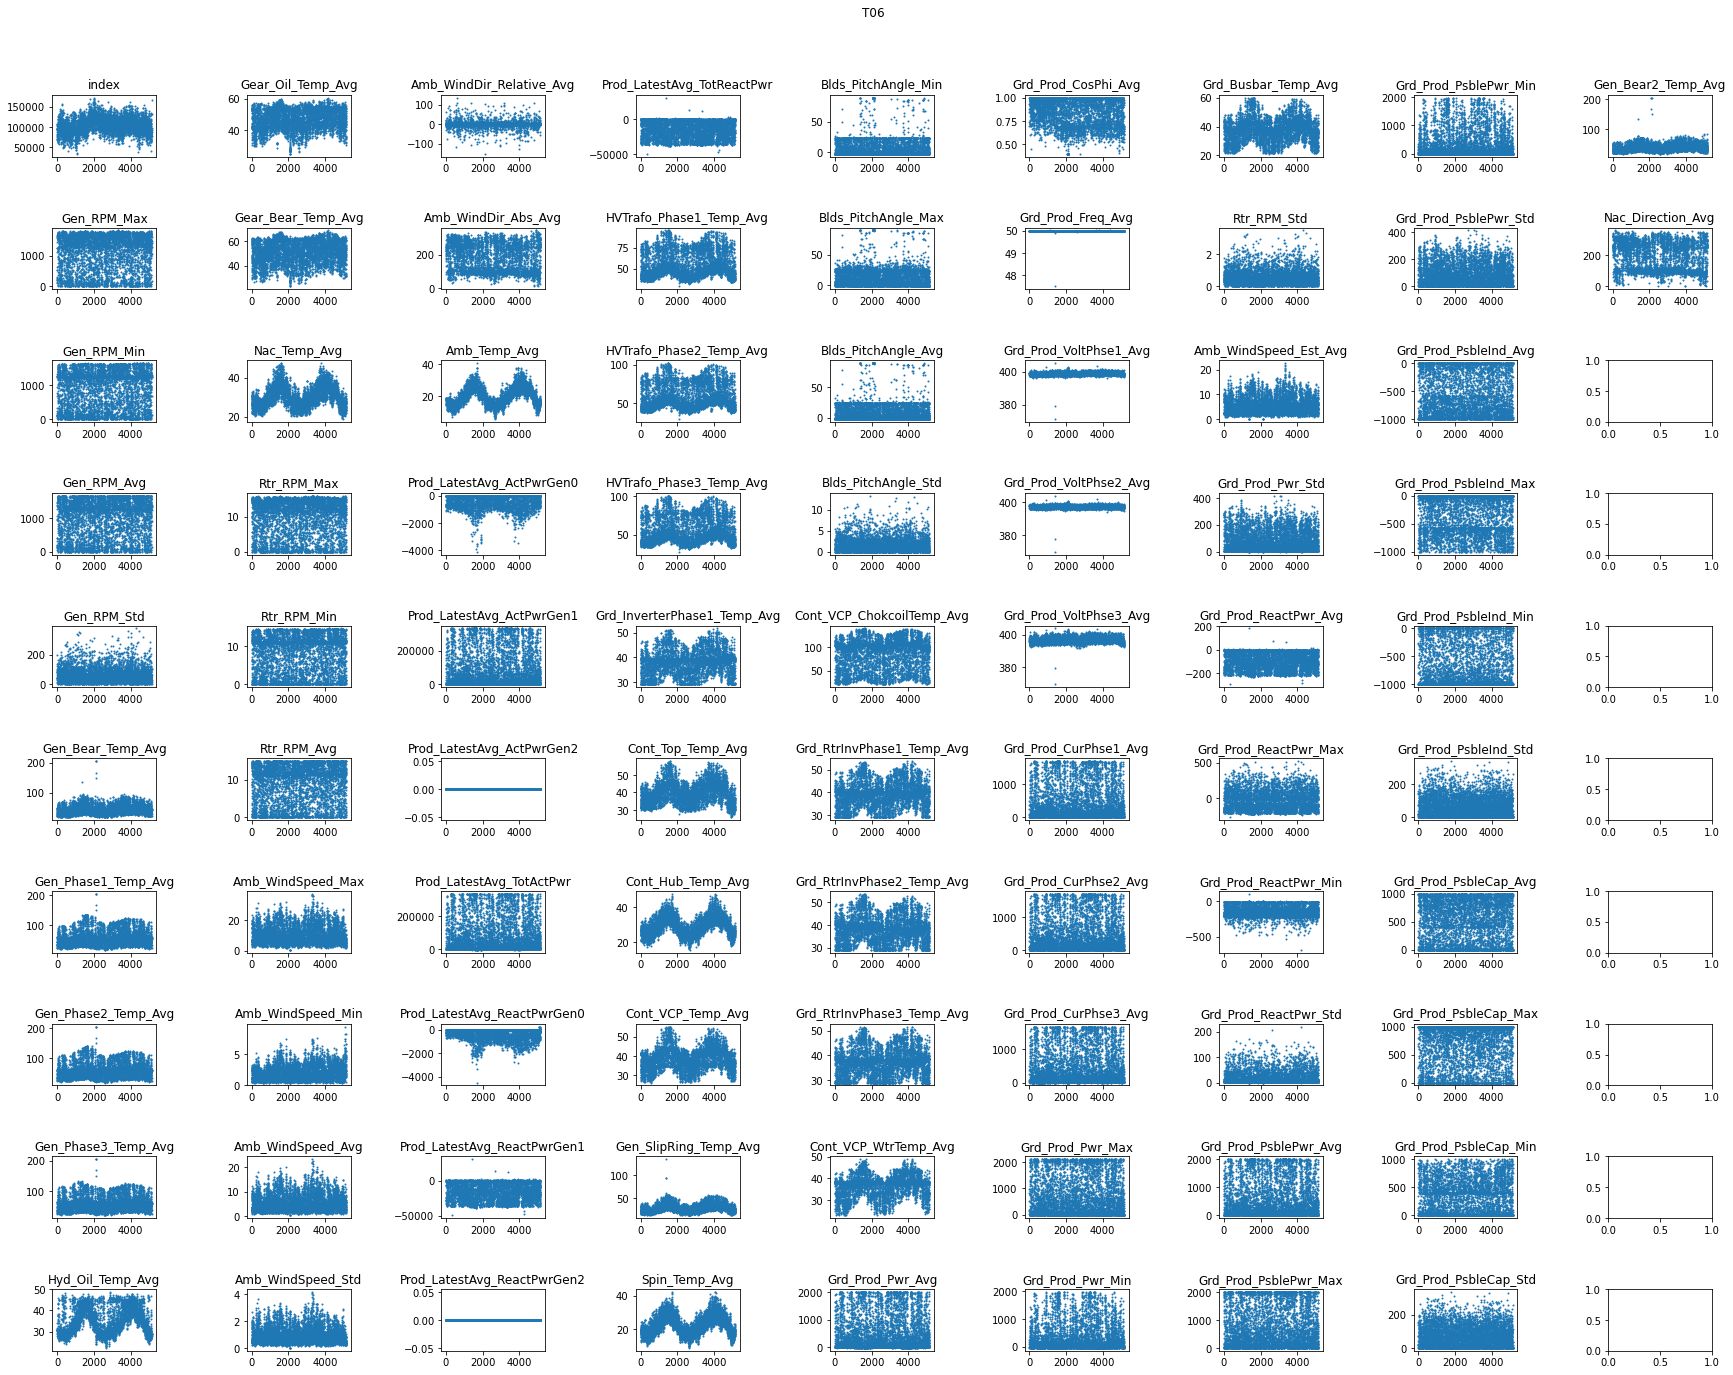

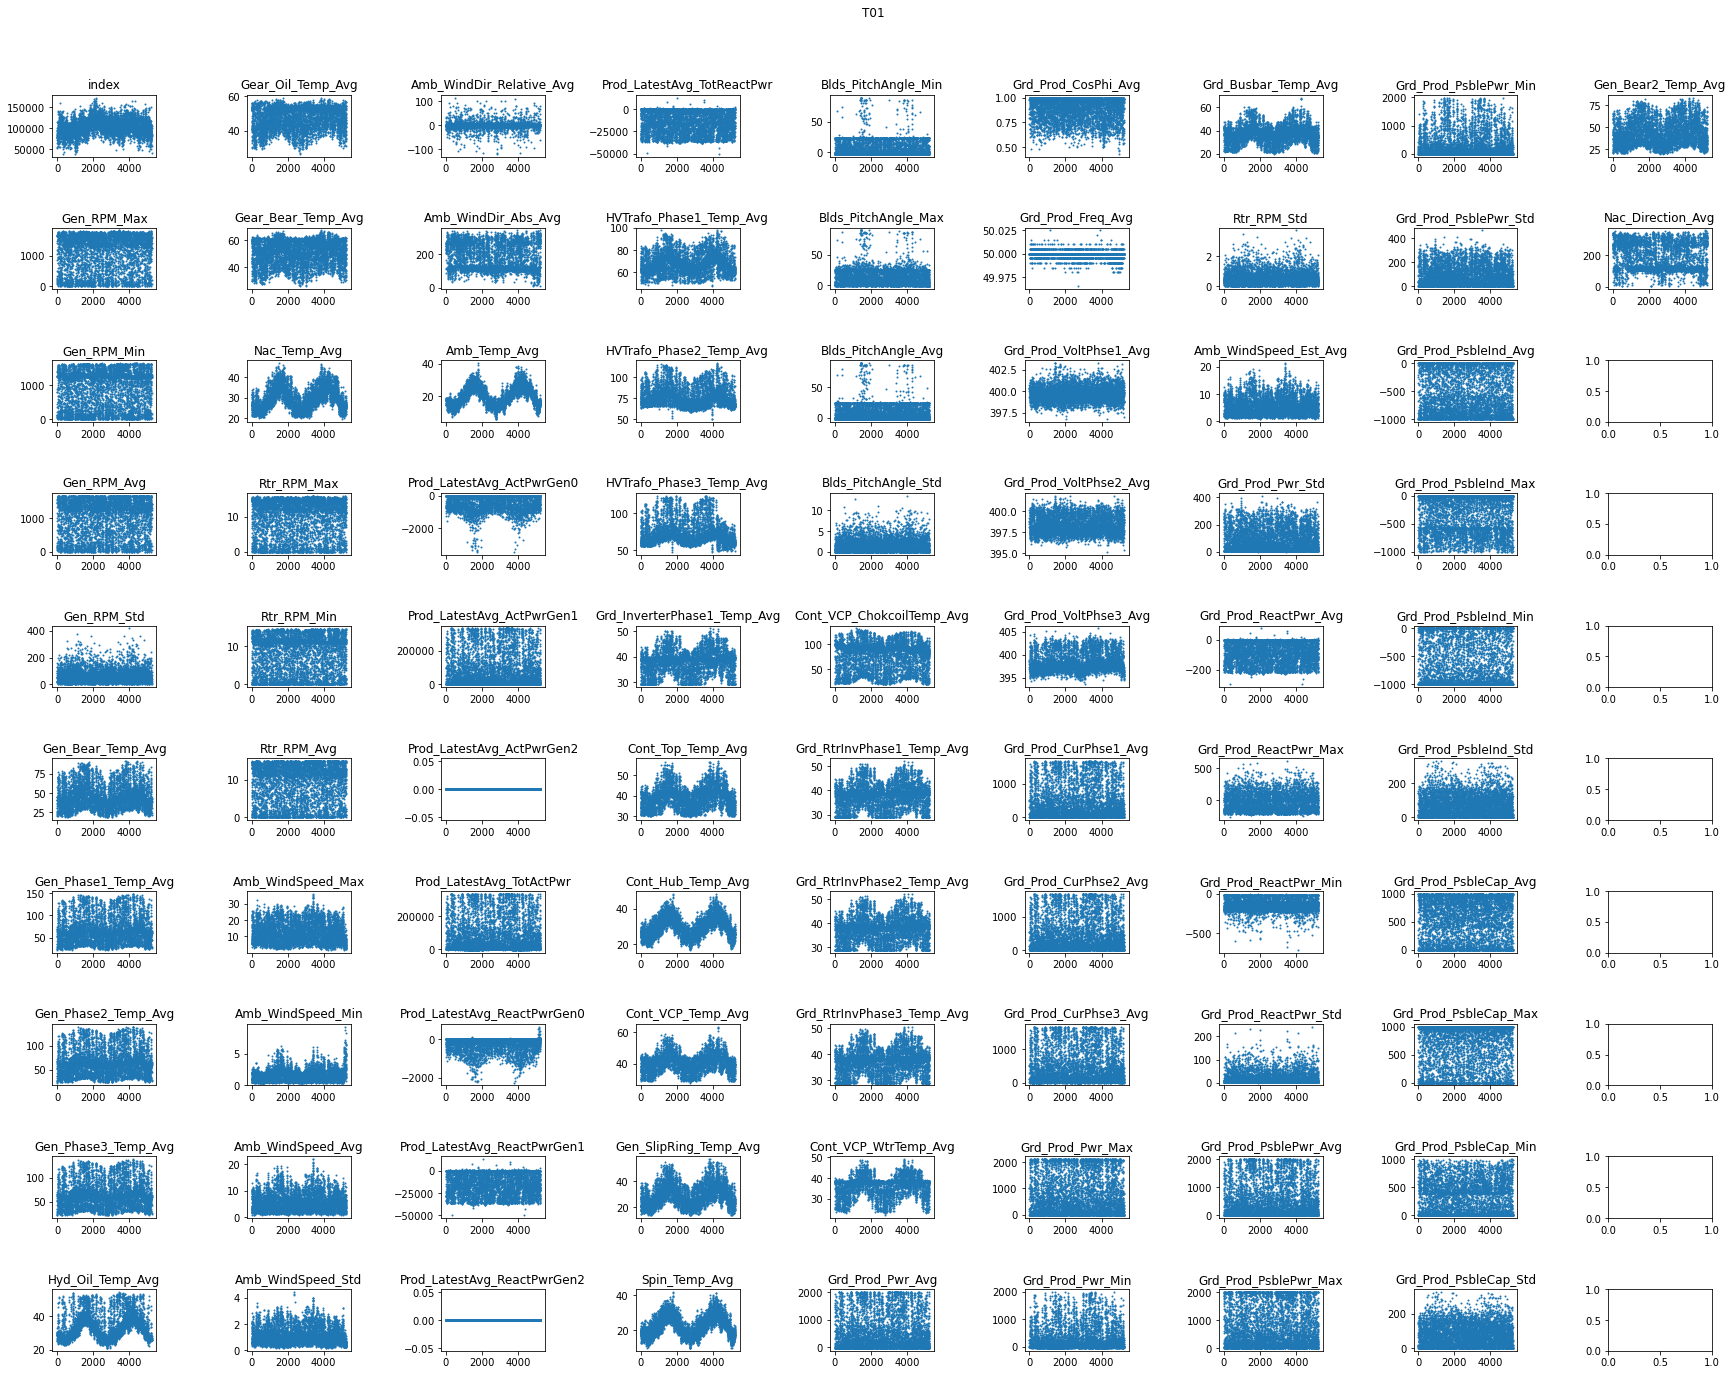

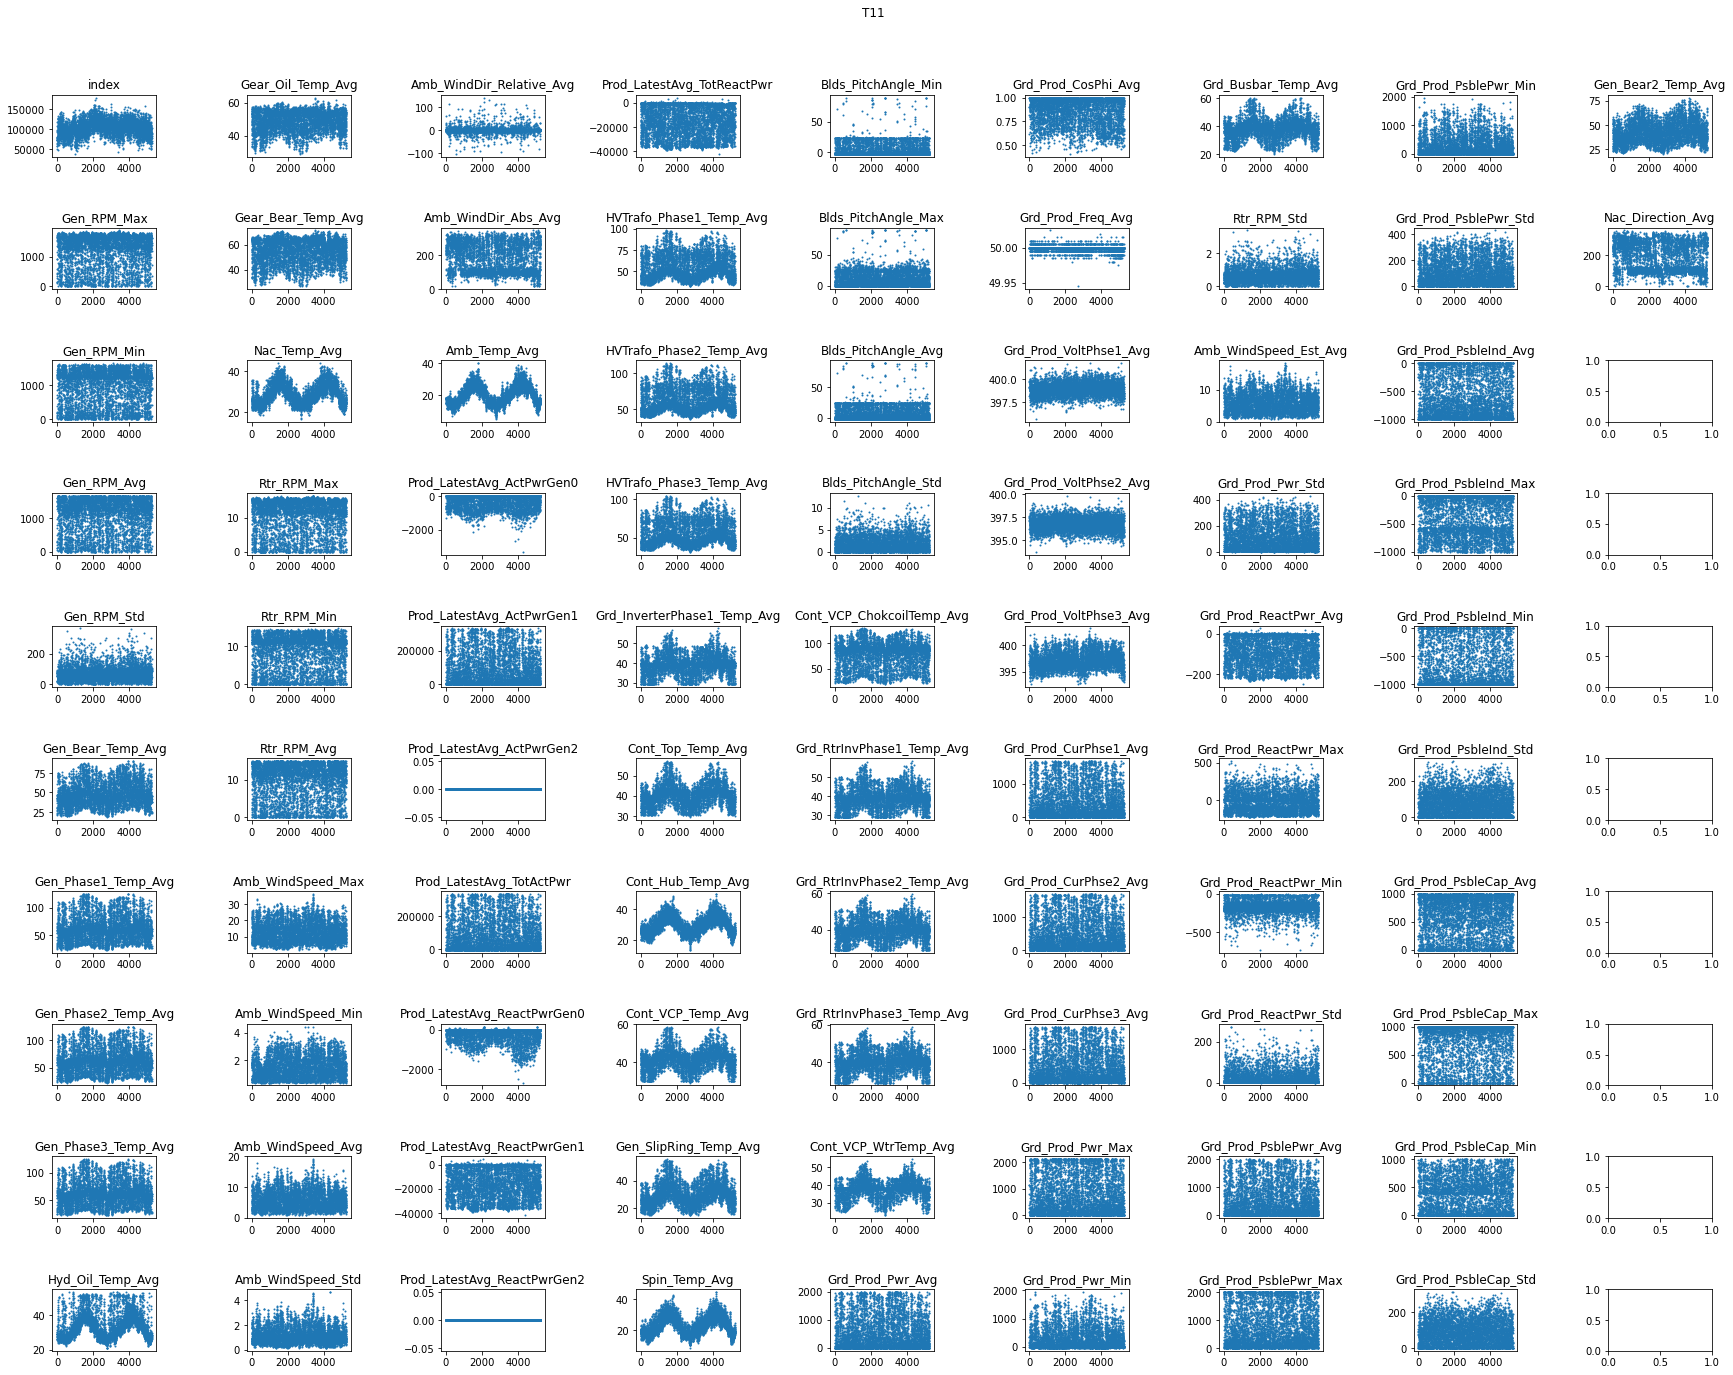

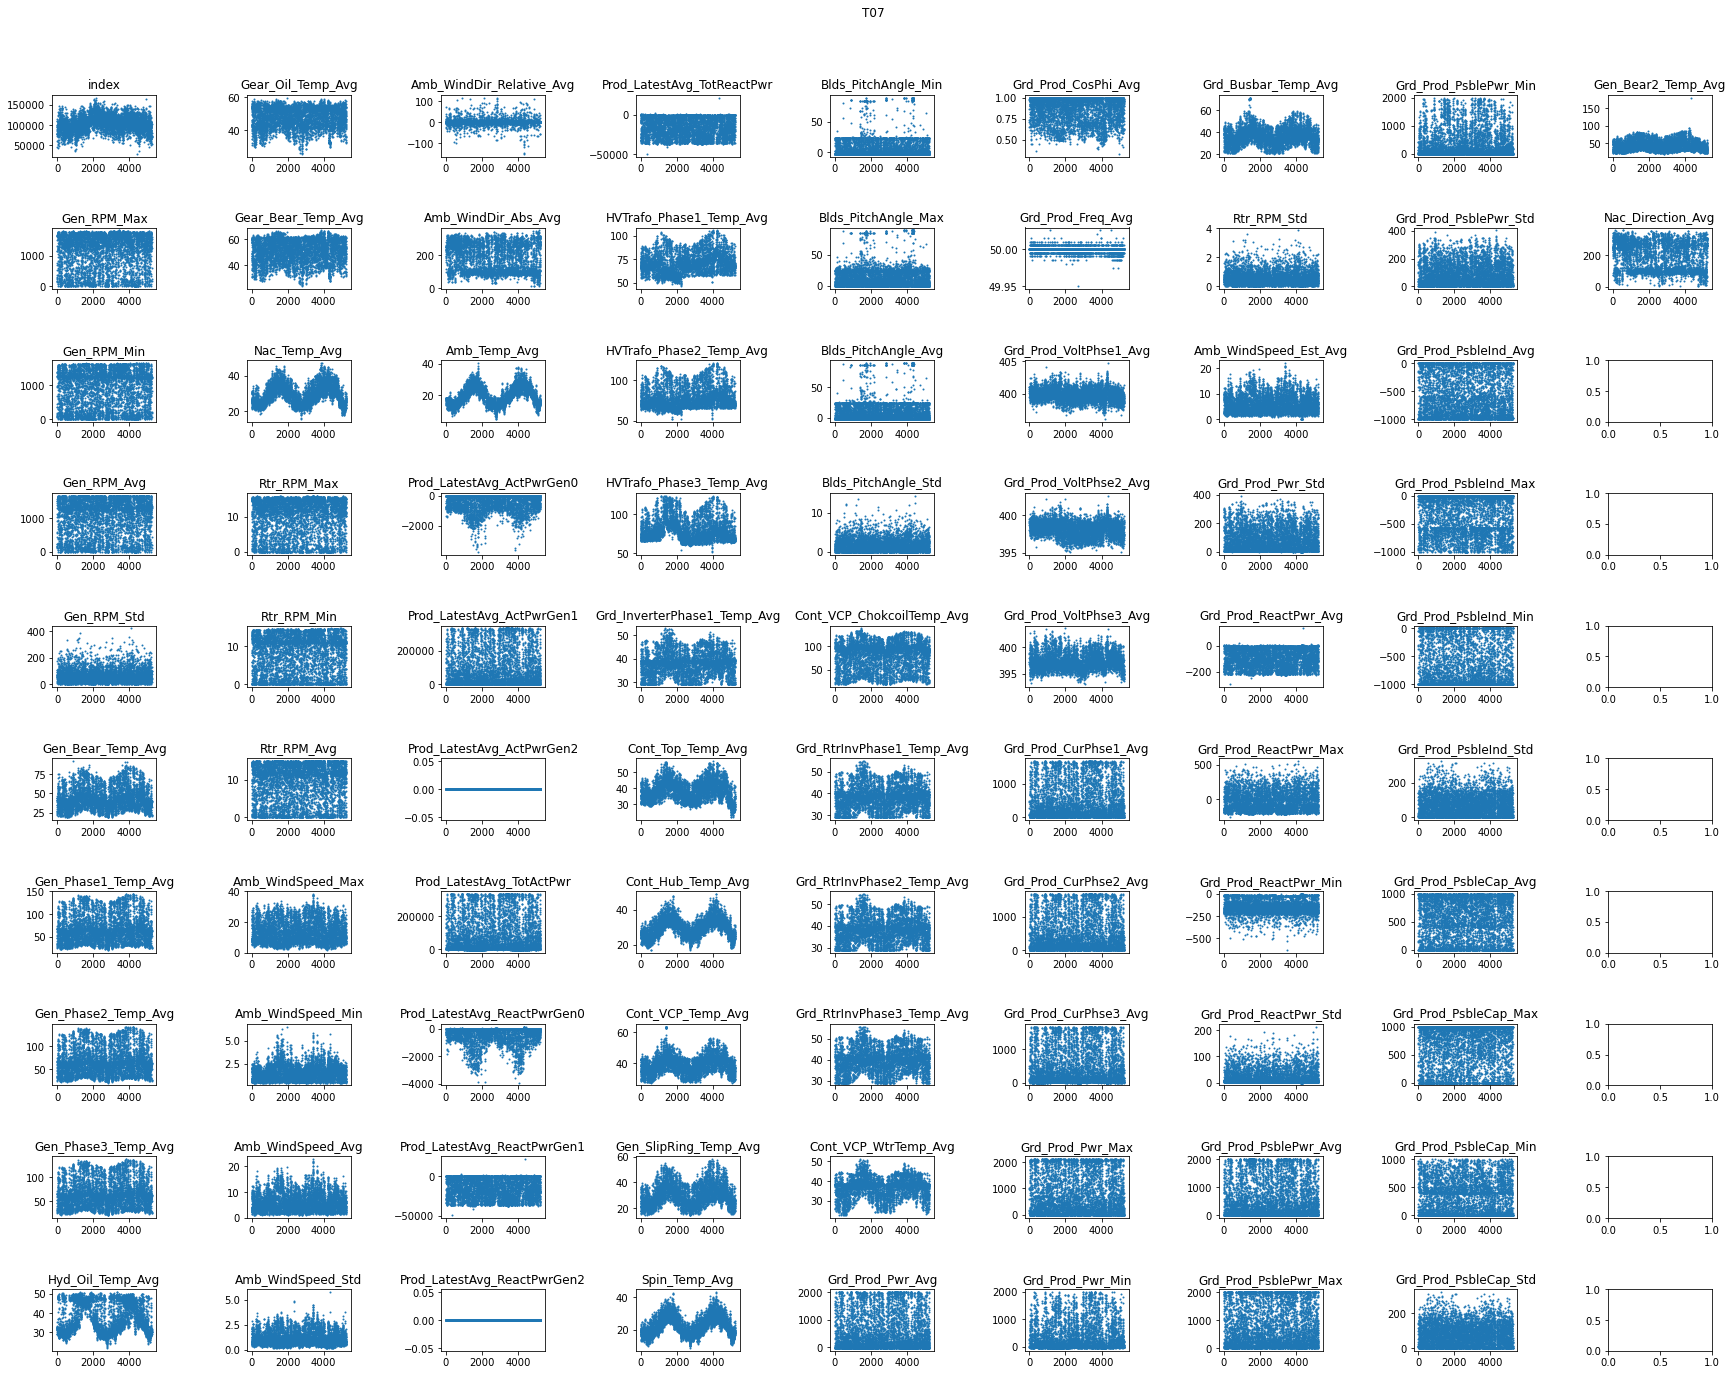

In [186]:
for i, df in enumerate(turbine_dfs):
    plot_data(df, turbine_names[i], 20)

### Signale mit niedriger Varianz herausfiltern

In [188]:

def get_signals_with_low_variance(df, threshold=0):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    cont_data = df.select_dtypes(include=numerics)
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(cont_data)
    inverted_list = ~np.array(selector.get_support())
    return cont_data.columns[inverted_list].tolist()

In [190]:
cols_to_drop = set()
for i, df in enumerate(turbine_dfs):
    cols_to_drop.update(get_signals_with_low_variance(df))

### Signale wieder zusammenführen

In [204]:
signals_clean = pd.concat(turbine_dfs)
signals_clean = signals_clean.drop(list(cols_to_drop), axis=1)

In [205]:
signals_clean.describe()

index    Gen_RPM_Max    Gen_RPM_Min    Gen_RPM_Avg  \
count  417141.000000  417141.000000  417141.000000  417141.000000   
mean   104285.811728    1190.486434     936.670981    1067.096004   
std     60211.028260     631.827468     607.263095     608.989196   
min         0.000000       0.000000       0.000000       0.000000   
25%     52142.000000     315.200000     194.800000     276.200000   
50%    104285.000000    1417.700000    1231.100000    1274.600000   
75%    156427.000000    1683.800000    1359.600000    1590.300000   
max    209235.000000    2040.900000    1675.600000    1685.000000   

         Gen_RPM_Std  Gen_Bear_Temp_Avg  Gen_Phase1_Temp_Avg  \
count  417141.000000      417137.000000        417141.000000   
mean       67.925213          46.116209            64.032723   
std       110.784748          15.495703            27.459765   
min         0.000000          18.000000            19.000000   
25%        13.300000          35.000000            43.000000   
50%        27.800000          44.000000            60.000000   
75%        71.200000          55.000000            76.000000   
max       823.100000         205.000000           205.000000   

       Gen_Phase2_Temp_Avg  Gen_Phase3_Temp_Avg  Hyd_Oil_Temp_Avg  ...  \
count        417141.000000        417141.000000     417141.000000  ...   
mean             64.076216            63.391827         35.423324  ...   
std              26.806766            26.083119          7.522915  ...   
min              19.000000            19.000000         20.000000  ...   
25%              43.000000            43.000000         29.000000  ...   
50%              61.000000            60.000000         34.000000  ...   
75%              76.000000            76.000000         41.000000  ...   
max             205.000000           205.000000         55.000000  ...   

       Grd_Prod_PsbleInd_Avg  Grd_Prod_PsbleInd_Max  Grd_Prod_PsbleInd_Min  \
count          417141.000000          417141.000000          417141.000000   
mean             -546.240281            -380.403486            -683.320405   
std               421.495029             389.854068             437.329736   
min             -1000.000000           -1000.000000           -1000.000000   
25%              -988.700000            -613.600000           -1000.000000   
50%              -642.300000            -299.100000           -1000.000000   
75%                 0.000000               0.000000               0.000000   
max                 0.000000             200.000000               0.000000   

       Grd_Prod_PsbleInd_Std  Grd_Prod_PsbleCap_Avg  Grd_Prod_PsbleCap_Max  \
count          417141.000000          417141.000000          417141.000000   
mean               74.822602             514.934477             670.799047   
std                96.191131             411.218061             435.151205   
min                 0.000000               0.000000               0.000000   
25%                 0.000000               0.000000               0.000000   
50%                18.100000             528.600000            1000.000000   
75%               140.800000             969.200000            1000.000000   
max               500.000000            1000.000000            1000.000000   

       Grd_Prod_PsbleCap_Min  Grd_Prod_PsbleCap_Std  Gen_Bear2_Temp_Avg  \
count          417141.000000          417141.000000       417141.000000   
mean              332.610897              81.835757           43.404427   
std               360.090459              99.078468           13.577242   
min              -200.000000               0.000000           19.000000   
25%                 0.000000               0.000000           33.000000   
50%               299.100000              32.400000           41.000000   
75%               540.200000             153.000000           52.000000   
max              1000.000000             500.000000          205.000000   

       Nac_Direction_Avg  
count      417141.000000  
mean         

## 2. Mast-Daten betrachten

In [169]:
metmast = pd.concat([metmast_2016, metmast_2017])

In [183]:
metmast.head()

Timestamp  Min_Windspeed1  Max_Windspeed1  Avg_Windspeed1  \
0  2016-06-24T13:50:00+00:00             0.9             5.4             3.2   
1  2016-06-24T14:20:00+00:00             0.4             4.9             2.6   
2  2016-11-28T12:10:00+00:00             0.3             1.5             0.9   
3  2016-06-25T06:30:00+00:00             1.0             1.9             1.2   
4  2016-12-23T11:50:00+00:00             2.6             9.6             5.6   

   Var_Windspeed1  Min_Windspeed2  Max_Windspeed2  Avg_Windspeed2  \
0            0.64             1.5             5.2             3.2   
1            0.96             0.5             5.0             2.6   
2            0.06             0.3             1.5             0.9   
3            0.03             1.0             1.9             1.3   
4            1.84             3.3             8.2             5.4   

   Var_Windspeed2  Min_Winddirection2  ...  Anemometer1_CorrOffset  \
0            0.64               236.0  ...                       0   
1            0.96               236.0  ...                       0   
2            0.06               236.0  ...                       0   
3            0.02               236.0  ...                       0   
4            0.77               236.0  ...                       0   

   Anemometer2_Freq  Anemometer2_Offset  Anemometer2_CorrGain  \
0            0.0499                0.24                     1   
1            0.0499                0.24                     1   
2            0.0499                0.24                     1   
3            0.0499                0.24                     1   
4            0.0499                0.24                     1   

   Anemometer2_CorrOffset  DistanceAirPress  AirRessureSensorZeroOffset  \
0                       0                 0                         600   
1                       0                 0                         600   
2                       0                 0                         600   
3                       0                 0                         600   
4                       0                 0                         600   

   Anemometer1_Avg_Freq  Anemometer2_Avg_Freq  Pressure_Avg_Freq  
0                    60                    60                410  
1                    49                    49                410  
2                    15                    14                406  
3                    21                    22                407  
4                   109                   105                427  

[5 rows x 41 columns]

In [178]:
df = metmast.describe()
df.loc['dtype'] = metmast.dtypes
df.loc['size'] = len(metmast)
df.loc['n_NaN'] = metmast.isnull().mean() * len(metmast)

print(df)

      Min_Windspeed1 Max_Windspeed1 Avg_Windspeed1 Var_Windspeed1  \
count        87527.0        87528.0        87527.0        87527.0   
mean        4.176164       8.374064       6.288644       0.932916   
std         2.565044       4.693669       3.635556       1.197053   
min              0.0            0.0            0.0            0.0   
25%              2.3            4.7            3.5           0.16   
50%              3.7            7.5            5.6           0.49   
75%              5.7           11.3            8.4           1.21   
max             17.8           30.8           23.1           35.1   
dtype        float64        float64        float64        float64   
size           87528          87528          87528          87528   
n_NaN            1.0            0.0            1.0            1.0   

      Min_Windspeed2 Max_Windspeed2 Avg_Windspeed2 Var_Windspeed2  \
count        87527.0        87528.0        87527.0        87527.0   
mean        4.337556        8.226

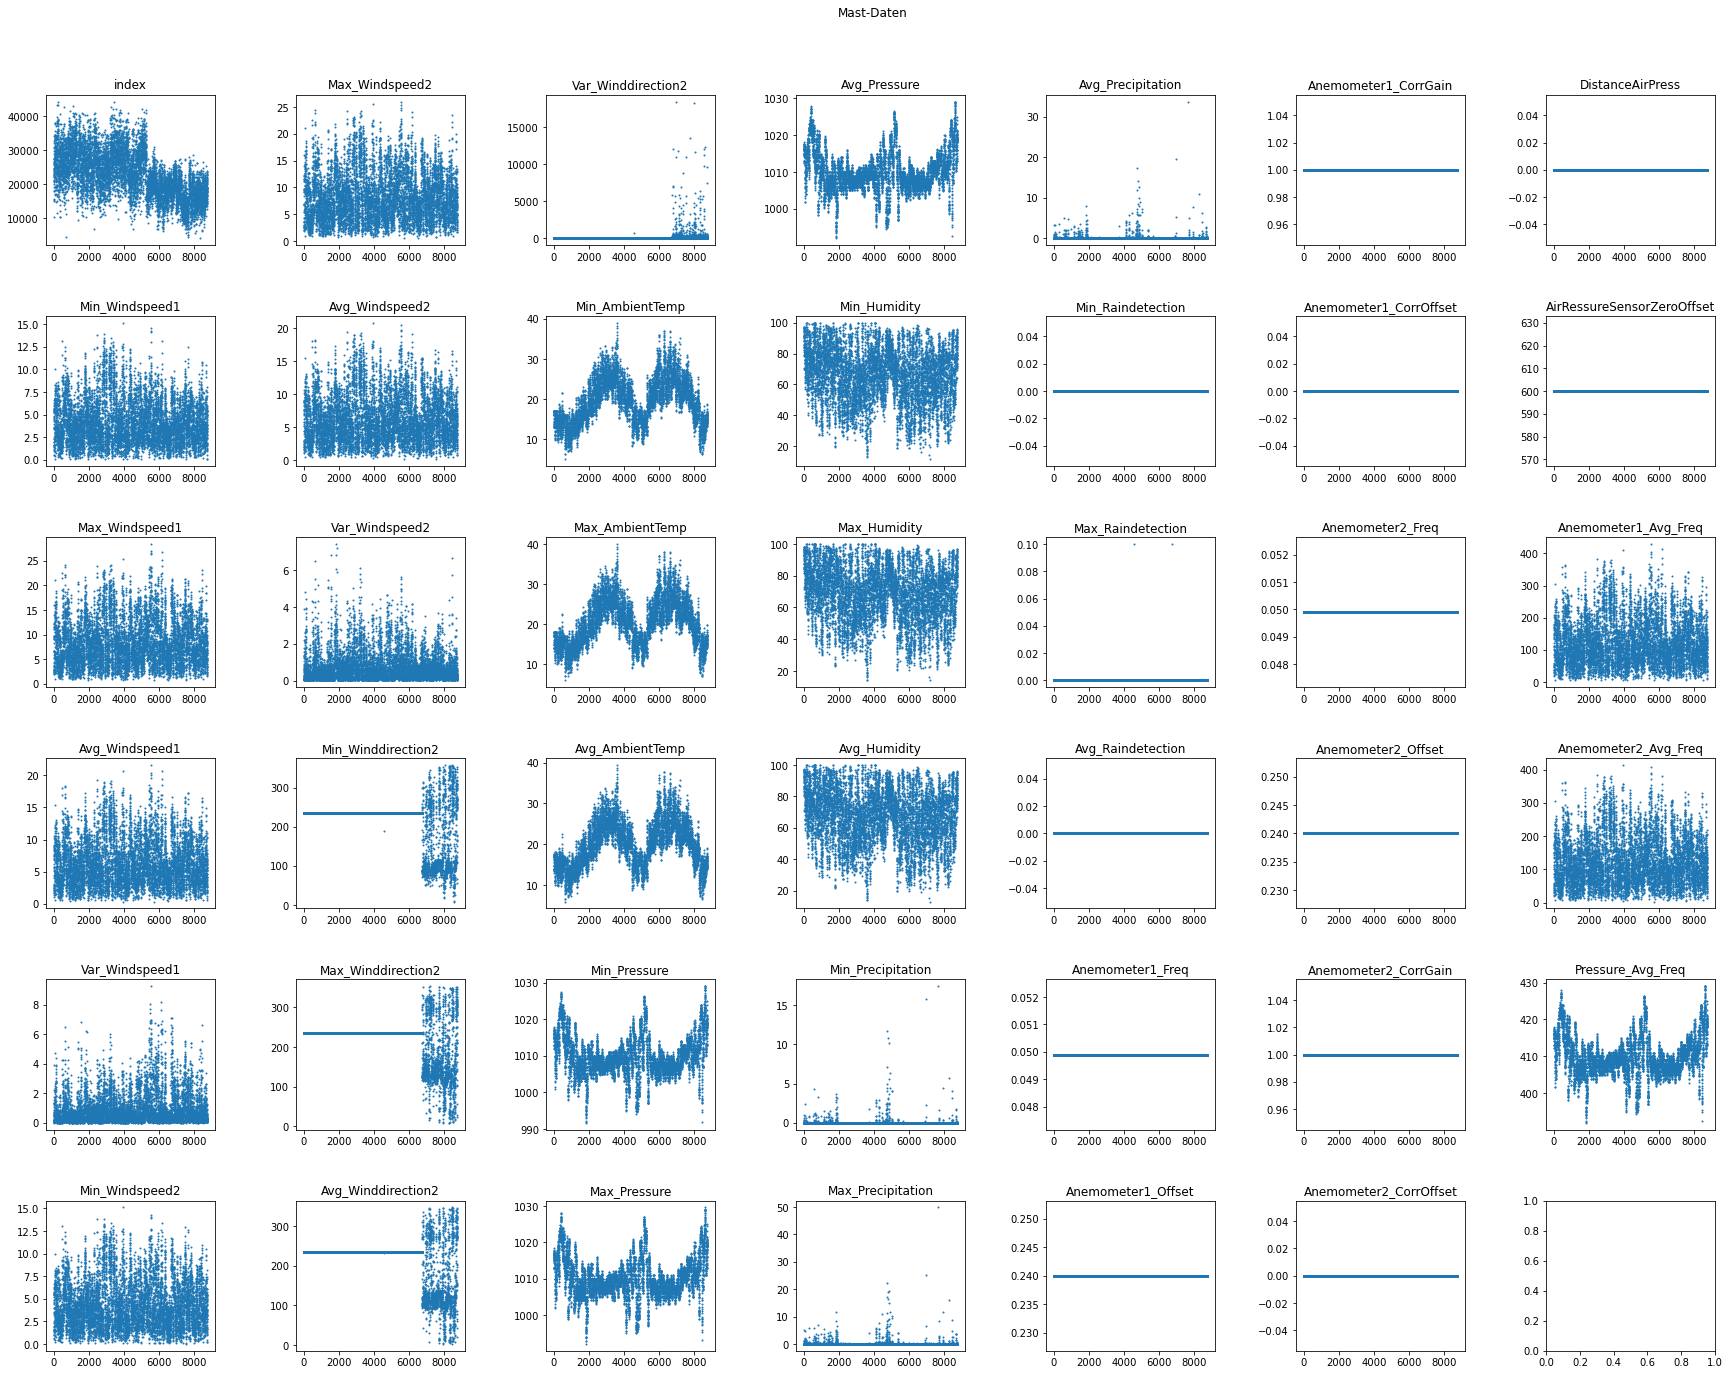

In [215]:
metmast = metmast.sort_values("Timestamp")
metmast = metmast.reset_index()

plot_data(metmast, "Mast-Daten", 10, (6, 7))

In [216]:
cols_to_drop = get_signals_with_low_variance(metmast)

In [217]:
metmast_clean = metmast.drop(cols_to_drop, axis=1)
metmast_clean = metmast.drop(["Min_Winddirection2", "Max_Winddirection2", "Avg_Winddirection2", "Var_Winddirection2"], axis=1)

In [220]:
metmast_clean.describe()

index  Min_Windspeed1  Max_Windspeed1  Avg_Windspeed1  \
count  87528.000000    87527.000000    87528.000000    87527.000000   
mean   22793.190990        4.176164        8.374064        6.288644   
std    14095.305666        2.565044        4.693669        3.635556   
min        0.000000        0.000000        0.000000        0.000000   
25%    10940.750000        2.300000        4.700000        3.500000   
50%    21881.500000        3.700000        7.500000        5.600000   
75%    32822.250000        5.700000       11.300000        8.400000   
max    52696.000000       17.800000       30.800000       23.100000   

       Var_Windspeed1  Min_Windspeed2  Max_Windspeed2  Avg_Windspeed2  \
count    87527.000000    87527.000000    87528.000000    87527.000000   
mean         0.932916        4.337556        8.226660        6.293094   
std          1.197053        2.735886        4.539296        3.629370   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.160000        2.200000        4.700000        3.500000   
50%          0.490000        3.800000        7.500000        5.600000   
75%          1.210000        6.000000       11.000000        8.500000   
max         35.100000       17.300000       29.000000       22.900000   

       Var_Windspeed2  Min_AmbientTemp  ...  Anemometer1_CorrOffset  \
count    87527.000000     87527.000000  ...                 87528.0   
mean         0.767873        19.417026  ...                     0.0   
std          0.953883         5.408462  ...                     0.0   
min          0.000000       -40.000000  ...                     0.0   
25%          0.150000        15.000000  ...                     0.0   
50%          0.440000        19.000000  ...                     0.0   
75%          1.000000        23.000000  ...                     0.0   
max         35.930000        39.000000  ...                     0.0   

       Anemometer2_Freq  Anemometer2_Offset  Anemometer2_CorrGain  \
count      8.752800e+04        8.752800e+04               87528.0   
mean       4.990000e-02        2.400000e-01                   1.0   
std        6.938934e-18        1.942901e-16                   0.0   
min        4.990000e-02        2.400000e-01                   1.0   
25%        4.990000e-02        2.400000e-01                   1.0   
50%        4.990000e-02        2.400000e-01                   1.0   
75%        4.990000e-02        2.400000e-01                   1.0   
max        4.990000e-02        2.400000e-01                   1.0   

       Anemometer2_CorrOffset  DistanceAirPress  AirRessureSensorZeroOffset  \
count                 87528.0           87528.0                     87528.0   
mean                      0.0               0.0                       600.0   
std                       0.0               0.0                         0.0   
min                       0.0               0.0                       600.0   
25%                       0.0               0.0                       600.0   
50%                       0.0               0.0                       600.0   
75%                       0.0               0.0                       600.0   
max                       0.0               0.0                       600.0   

       Anemometer1_Avg_Freq  Anemometer2_Avg_Freq  Pressure_Avg_Freq  
count          87528.000000          87528.000000       87528.000000  
mean             122.606069            122.702827         410.034275  
std               72.875517             72.751763           5.236386  
min                0.000000              0.000000         391.000000  
25%               67.000000             67.000000         407.000000  
50%              108.000000            109.000000         409.000000  
75%              166.000000            167.000000         413.000000  
max              459.000000            455.000000         429.000000  

[8 rows x 37 columns]